<a href="https://colab.research.google.com/github/xzhan176/Network_Node_Selection/blob/main/Paralleling_Simulation_Less_Memory_12_16_2022_success!!.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
##### This code is from Updated Testing Reddit - No Con- bias (Fictitious Play)-01092022
##### This code replace the big real datanetwork with small sythetic network 
import scipy
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from itertools import combinations
import time
import random
from random import randint
from scipy.stats import beta
import pandas as pd
import copy
%matplotlib inline
# %run Check_Derivation_of_Two_Opinions.ipynb
#%run pure_strategy_selection.ipynb  #include simple selection algorithm
import scipy.io
import collections
import sys
from itertools import count
from itertools import combinations
from itertools import product
import scipy.optimize
import csv
import os.path
from math import comb
from itertools import count
from time import sleep
import time
import multiprocessing
from multiprocessing import Process
from multiprocessing import Queue
from operator import itemgetter

# Game Parameters
# Game_rounds =200 # Rounds + 1- use for printing data
memory = 50

save_path = 'C:/Users/xzhan176/OneDrive/Misinfo Paper/Sythetic Network - less memory version/'



    # Flexible Manual set condition 
      > initial starting node
      > memory of the player 
    # Fixed initial condition + memeory = 50

## Mathmatic Functions

In [2]:
# centers the opinion vector around 0\n",
def mean_center(op, n):
    ones = np.ones((n, 1))
    x = op - (np.dot(np.transpose(op),ones)/n) * ones
    return x
    
# compute number of edges, m\n
def num_edges(L, n):
    m = 0
    for i in range(n):
        for j in range(n):
            if i > j and L[i,j] < 0:
                m += 1            
    return m

# Compute number of possible actions
def len_actions(k, n):
    # create all combination of K opinions
    max_option = [0, 1]  
    k_opinions =list(product(max_option, repeat=k))  # All k opinion combinations
    len_kops = len(k_opinions) # - number of combinations exist
    # Horizontal length of all possible actions
    h = comb(n,k) * len_kops
    return h


# maximizing polarization only: \\bar{z}^T \\bar{z}   
def obj_polarization(A, L, op, n):
    op_mean = mean_center(op, n)
    z_mean = np.dot(A, op_mean)
    return np.dot(np.transpose(z_mean), z_mean)[0,0] 

# Calculate innate polarization
def obj_innate_polarization(s, n):  
#     np.set_printoptions(precision=5)
    op_mean = mean_center(s, n)
    return np.dot(np.transpose(op_mean), op_mean)[0,0]

np.set_printoptions(precision=5)

In [3]:
k = 2
n = 100
# #comb(n,k)
h = len_actions(k, n)
print(h)
np.set_printoptions(precision=5)

19800


In [4]:
########### create all combination
def cgen(i,n,k):
    """
    returns the i-th combination of k numbers chosen from 1,2,...,n
    """
    c = []
    r = i+0
    j = -1
    for s in range(1,k+1):
        cs = j+1
        while r-comb(n-1-cs,k-s)>=0:
            r -= comb(n-1-cs,k-s)
            cs += 1
        c.append(cs)
        j = cs
    return c
# Create available combinations
def convert_available(k_nodes, touched, k):
    
    #touched = list(set(touched)) #[2,4,6,8] unqie values of touched
    touched.sort()
    for i in touched: 
        for j in range(k): #[2,3,4,5,6,7,8,9]   
            if k_nodes[j]>=i:
                k_nodes[j] = k_nodes[j] + 1
    return k_nodes

# def creat_all_comb(i_th, n, k):
# ########### create all combination of K opinions
#     max_option = [0, 1]
#     k_opinions =[]
#     k_opinions = product(max_option, repeat=k)  # - all k opinion combinations
#     k_nodes = cgen(i_th,n,k)
#     return(k_nodes, k_opinions)

def creat_all_comb(n, k):
########### create all combination of K opinions
    max_option = [0, 1]
    k_opinions =[]
    k_opinions = product(max_option, repeat=k)  # - all k opinion combinations
    
    return list(k_opinions)


########### create available combination of K nodes
def creat_available_comb(i_th, n,k,touched):

    a = len(set(touched))  # number of unqiue touched nodes
    len_nodesets = comb(n-a,k) #  number of available combination of k nodes
    
    k_fake = cgen(i_th,n-a,k) # generate the i-th list from total n-a agents
    k_nodes = convert_available(k_fake, touched, k) # convert the i-th list to real k nodes

    return (k_nodes)

# output is changed opinion set based on inputs 
def change_k_innate_opinion(s, node_set, k_opinion): # node_set - 1 set  k_opinion- 1 set
    op =  copy.copy(s) # make a copy of the innate opinion array 

    for j in range(k):
        b = node_set[j] # b - agent index
#         print('agent index' + str(b))
#         print('op length'+ str(len(op)))
#         print('k_opinions'+str(list(k_opinions)))
        op[b]=k_opinion[j]   # f - index of which opinion combination

    return op

In [ ]:
# i_th = 0
# v2 = creat_available_comb(i_th, n,k,touched)
# print(v2)

In [ ]:
# # i = 4
# # n = 20
# # k = 2
# # touched = [8, 17, 2, 6]
# # creat_available_comb(i, n,k,touched)
# k_nodes=[1,2]
# touched = [2,3]
# k = 2
# convert_available(k_nodes, touched, k)

### 1. Import Network

c1
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]
G for agents completed!
[[0.     0.0346 0.0317 ... 0.031  0.0003 0.0243]
 [0.0346 0.     0.0041 ... 0.0019 0.017  0.0247]
 [0.0317 0.0041 0.     ... 0.0198 0.0319 0.    ]
 ...
 [0.031  0.0019 0.0198 ... 0.     0.0295 0.0257]
 [0.0003 0.017  0.0319 ... 0.0295 0.     0.003 ]
 [0.0243 0.0247 0.     ... 0.0257 0.003  0.    ]]
Column Sum
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]


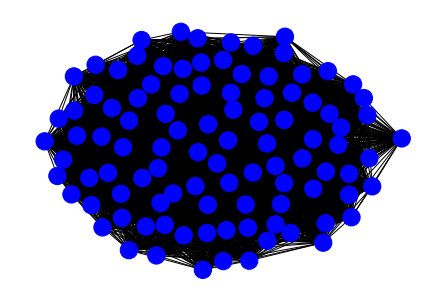

<Figure size 1800x1800 with 0 Axes>

In [5]:
############################ Make Innate Opinion ################################
##create two set of weights connected with density 1) inviduals  2) individual & informaton Source
c1 = np.sort(np.random.choice(n, n, replace=False)) #assume (1-r) are individuals
print('c1')
print(c1)
l1 = len(c1)

def make_innat_opinions(n, c1): # Make opinion for agents only - no info source is involved
    
    # Make list of ind innate opinion to define info source opinion
    innat_s = np.random.uniform(low=0, high=1, size=int(n))   #individual's innate opinion 

    s = np.zeros((n, 1))
    
    idx1 = 0
    for i in range(len(s)):
        s[i] = innat_s[idx1]  #set innate opinion for ind.
        idx1 += 1
  
    return s


##################################Creating Adjacency Matrix ########################
np.set_printoptions(precision=4)
### Prepare for create adjacent matrix
p1 = 0.9 # density within ind.
p2 = 0 # density of edges between Info Source and Indivisuals

pre_weights1 = scipy.sparse.random(1, int(0.5*l1*(l1 - 1)), density=p1).A[0] 
weights1 = pre_weights1/25


# print("weight1")
# print(weights1)
weights1.shape

# b = weights2.round()  #generate a binary array to indicate the connection between ind. and inf. source 
                          #without consider the innate opinions, just based on the edges between info source and ind.

    
    
# create n x n adjacency matrix with existing init_G
G = np.zeros((n, n))
    
## Assign edges between ind to ind 
idx = 0
for i in c1:
    for j in c1:
            if i == j:
                G[i][j] =0
                continue
            elif i < j:
                G[i][j] = weights1[idx]
                idx += 1
#                 print(idx)
#                 print (G1[i][j])
            else:
                G[i][j] = G[j][i]
print("G for agents completed!")
print(G)

L = scipy.sparse.csgraph.laplacian(G, normed=False)
A = np.linalg.inv(np.identity(n) + L)
m = num_edges(L, n)
columnsum_ij = np.sum(A, axis=0)
print('Column Sum')
print(columnsum_ij)
# what the twitter graph looks like 
# nxG = nx.from_numpy_matrix(G)
# plt.figure(figsize=(20, 20))
# nx.draw(nxG)

La = scipy.sparse.csgraph.laplacian(G, normed=False)

nxG = nx.from_numpy_matrix(G)

color_map = []
for node in nxG:
    if node in c1:
        color_map.append('Blue')
    else: 
        color_map.append('Red')  

#nxG1 = nx.DiGraph(G)
nx.draw(nxG, node_color=color_map, with_labels=False)
plt.figure(figsize=(25, 25))
plt.show()

In [6]:
s = make_innat_opinions(n, c1)
print(s)
# #################### Import Sythetic Network Data
# df = pd.read_csv (save_path+'data/Adjacency Matrix.csv', header=None)
# G = np.array(df[df.columns[:]])
# # print(G)
# df1 = pd.read_csv(save_path+'data/Innate Opinion.csv', header = None)
# s = np.array(df1[df1.columns[:]])
# # print(s)
# # print(G.shape)

# # Set n according to the data
# n = len(s[:])
# print(n)

[[0.6068]
 [0.6921]
 [0.4802]
 [0.8933]
 [0.9818]
 [0.2136]
 [0.7834]
 [0.3805]
 [0.7999]
 [0.7668]
 [0.2999]
 [0.5767]
 [0.6241]
 [0.0042]
 [0.5527]
 [0.4305]
 [0.9248]
 [0.7387]
 [0.9877]
 [0.0064]
 [0.2287]
 [0.4437]
 [0.3051]
 [0.6602]
 [0.926 ]
 [0.6594]
 [0.6734]
 [0.5458]
 [0.4557]
 [0.0884]
 [0.6838]
 [0.3335]
 [0.9031]
 [0.1629]
 [0.7096]
 [0.8683]
 [0.7099]
 [0.6483]
 [0.6596]
 [0.3402]
 [0.9531]
 [0.8684]
 [0.9705]
 [0.3547]
 [0.2642]
 [0.675 ]
 [0.2894]
 [0.0573]
 [0.8128]
 [0.261 ]
 [0.4823]
 [0.6507]
 [0.2898]
 [0.6669]
 [0.8081]
 [0.179 ]
 [0.7178]
 [0.4529]
 [0.7279]
 [0.003 ]
 [0.2306]
 [0.1507]
 [0.6485]
 [0.5974]
 [0.6255]
 [0.3371]
 [0.4947]
 [0.6103]
 [0.0215]
 [0.9721]
 [0.0673]
 [0.9185]
 [0.4949]
 [0.9234]
 [0.2649]
 [0.1416]
 [0.859 ]
 [0.7957]
 [0.8205]
 [0.7288]
 [0.0814]
 [0.4766]
 [0.4722]
 [0.5025]
 [0.8429]
 [0.6877]
 [0.6289]
 [0.6142]
 [0.5539]
 [0.6369]
 [0.3578]
 [0.801 ]
 [0.8716]
 [0.1818]
 [0.0914]
 [0.8511]
 [0.7166]
 [0.3609]
 [0.0808]
 [0.3835]]

In [ ]:
# G = creat_network(n)
# s = make_innat_opinion(n)

In [7]:
################## Process the Network Data
L = scipy.sparse.csgraph.laplacian(G, normed=False)  # Return the Laplacian matrix
A = np.linalg.inv(np.identity(n) + L)  # A = (I + L)^(-1)\n  Stanford paper theory
m = num_edges(L, n)                    # call the function to calculate the number of edges
# what the twitter graph looks like 
nxG = nx.from_numpy_matrix(G)          
#plt.figure(figsize=(20, 20))
# nx.draw(nxG)
columnsum_ij = np.sum(A, axis=0)
# print(columnsum_ij)


### 2. Equilibrium & Polarization 
$$P(z) = z ^T * z $$


In [9]:
# op = s
# y = mean_center(s,n)
# # print(y)
# innat_pol = np.dot(np.transpose(y), y)[0,0] 
# print('Innate_polarization:')
# print(innat_pol)

# # Test equilibrium polarization
# equ_pol = obj_polarization(A, L, s, n)
# print('Equi_polarization:')
# print(equ_pol)

# di = equ_pol-innat_pol
# print("Difference:")
# print(di)

### 3. Helper Functions

In [8]:
def k_random_play(s,n,k):  # player randomly choose an agent and randomly change the agent
    
    op = copy.copy(s)
    
    ########### create all combination of K nodes
    k_opinions = creat_all_comb(n, k)
    len_nodesets = comb(n,k)

    i_th = random.randint(0,len_nodesets-1)  # randomly select an agent index
#     v_list = node_sets[v_index]
    v_list = cgen(i_th,n,k)
    
    ########### create all combination of K opinions
    len_kops = len(k_opinions) # - number of combinations exist
    op_index = random.randint(0,len_kops-1) # randomly select index for an OPINION list 
    new_op = k_opinions[op_index]  # randomly select an opininon list(0 and 1) to update the opinion array
#     print('Nodes, opinions')
#     print(v_list,new_op)
#     print(new_op)
    op = change_k_innate_opinion(s, v_list, new_op)

   # print("    "+"Agent" + str(v) +" 's opinion " + str(old_opinion) + " changed to "+ str(new_op))
    
    por = obj_polarization(A, L, op, n)
    
    column = len_kops*i_th + op_index
#     print("Network reaches stead_state Polarization: " + str(por))

    return (v_list, new_op, por, column)


In [9]:
def k_random_play_1(s,n,k,max_touched):  # player randomly choose an agent and randomly change the agent
    
    op = copy.copy(s)
#     max_opi_option = random.uniform(0, 1)   # options that maximizer have

    a = len(set(max_touched))  # number of unqiue touched nodes
    len_nodesets = comb(n-a,k) #  number of available combination of k nodes
    
    i_th = random.randint(0,len_nodesets-1)  # randomly select an action index
    v_list = creat_available_comb(i_th, n,k,max_touched)
  
    new_op_list = []
    for i in range(k):
        #new_op = random.uniform(0, 1)  # randomly select an opininon between 0 and 1
        new_op = 0.5
        new_op_list.append(new_op)
   
    new_op_list = tuple(new_op_list)
#     print('Nodes, opinions')
#     print(v_list,new_op_list)
    op = change_k_innate_opinion(s, v_list, new_op_list)
   # print("    "+"Agent" + str(v) +" 's opinion " + str(old_opinion) + " changed to "+ str(new_op))
    por = obj_polarization(A, L, op, n)
#     print("Network reaches steady-state Polarization: " + str(por))
#     print('Should be restored')
#     print(op)
    return (v_list, new_op_list, por)





In [ ]:
# k = 2
# max_touched = [1,2]
# (v, new_op_list, por) =k_random_play_1(s,n,k,max_touched)
# print(v, new_op_list, por)

In [ ]:
# max_touched = [0]
# v2 = [0]
# k = 2
# node_set = [1,2]
# k_opinion = [0,0]

### Mixed Strategy Payoff


In [10]:
np.set_printoptions(precision=3)
def make_k_payoff_row(op1, h, v2): #op1 here is only changed by Min
    payoff_row = np.zeros(h)
    
    column = 0 
    i = 1
    for i in range(0, comb(n,k)):# i - which set of nodes option 
#         print('nodeset'+ str(i))
        nodes = cgen(i,n,k)
#         print(nodes)
        k_opinions = creat_all_comb(n, k)

        for ops in k_opinions: # tuple index - select one combinatio of opinions
#             print('opset'+ str(j))
#             j = j + 1
            op2 = change_k_innate_opinion(op1, nodes, ops) # op2 has changed by both min and max now
            check =  any(node in nodes for node in v2)     
            
 # when v1 == v2, the polarization should be negative for max, infinet for min. 
 # Replace the the column_index of agent v2 with 0 for max                   
            if check is False:    #if v1 != v2
                # calculate the payofflarization
                payoff = obj_polarization(A, L, op2, n) # calculate the payofflarization
                payoff_row[column] = payoff
                column = column + 1  
#                 print(payoff_row) 
            else:                #if v1 == v2   
                payoff_row[column] = 10000  # use to avoid min and max choose the same agent
                column = column + 1  
#                 print(payoff_row)   
            
#     print(payoff_row)        


    return payoff_row    

In [ ]:
# h =  len_actions(k, n)
# print(h)
# v2 = (1,2)
# payoff_row = make_k_payoff_row(s, h, v2)

# print(payoff_row)
# # print(len(s))

### Minimizer Mixed Strategy

In [11]:
# Calculate polarization of minimizer's Mixed Strategy
def mixed_K_min_polarization(s,v2,k_opinion,fla_max_fre):

    op1 = change_k_innate_opinion(s, v2, k_opinion) # only updated by minimizer's current change
    # calculate the polarization with both min(did above) and max's action(in make_payoff_row)
    payoff_row = make_k_payoff_row(op1, h, v2)  # the vector list out 2*n payoffs after min's action combine with 2*n possible max's actions
#     print('payoff_row')
#     print(payoff_row)
    #calculate fictitious payoff - equi_min  
    payoff_cal = payoff_row * fla_max_fre # fla_max_fre recorded the frequency of each maximizer's action, frequency sum = 1
                                             # payoff (2*n array) * maximizer_action_frequency (2*n array)
    # print('payoff_cal')
    # print(payoff_cal)
    mixed_pol = np.sum(payoff_cal) # add up all, calculate average/expected payoff
#     print('Mixed_pol')
#     print(mixed_pol)

    # Replace the the column_index of agent v2 with -100 for max

    payoff_row = [-10000 if ele == 10000 else ele for ele in payoff_row]


    return (mixed_pol,payoff_row)


In [12]:
node_set = [1,2]
k_opinion = [0,1]
op = change_k_innate_opinion(s, node_set, k_opinion)
print(op)
v2 = [3,4]
a= mixed_K_min_polarization(s,v2,k_opinion,fla_max_fre)
print(a)

[[0.607]
 [0.   ]
 [1.   ]
 [0.893]
 [0.982]
 [0.214]
 [0.783]
 [0.381]
 [0.8  ]
 [0.767]
 [0.3  ]
 [0.577]
 [0.624]
 [0.004]
 [0.553]
 [0.431]
 [0.925]
 [0.739]
 [0.988]
 [0.006]
 [0.229]
 [0.444]
 [0.305]
 [0.66 ]
 [0.926]
 [0.659]
 [0.673]
 [0.546]
 [0.456]
 [0.088]
 [0.684]
 [0.334]
 [0.903]
 [0.163]
 [0.71 ]
 [0.868]
 [0.71 ]
 [0.648]
 [0.66 ]
 [0.34 ]
 [0.953]
 [0.868]
 [0.97 ]
 [0.355]
 [0.264]
 [0.675]
 [0.289]
 [0.057]
 [0.813]
 [0.261]
 [0.482]
 [0.651]
 [0.29 ]
 [0.667]
 [0.808]
 [0.179]
 [0.718]
 [0.453]
 [0.728]
 [0.003]
 [0.231]
 [0.151]
 [0.649]
 [0.597]
 [0.626]
 [0.337]
 [0.495]
 [0.61 ]
 [0.021]
 [0.972]
 [0.067]
 [0.918]
 [0.495]
 [0.923]
 [0.265]
 [0.142]
 [0.859]
 [0.796]
 [0.821]
 [0.729]
 [0.081]
 [0.477]
 [0.472]
 [0.503]
 [0.843]
 [0.688]
 [0.629]
 [0.614]
 [0.554]
 [0.637]
 [0.358]
 [0.801]
 [0.872]
 [0.182]
 [0.091]
 [0.851]
 [0.717]
 [0.361]
 [0.081]
 [0.383]]


NameError: ignored

In [13]:
############################################ k Min_opinion - Python Package Solve  ################################
# k = 2
# v2=[1,2]


############## Create the sum_term - exclude selected nodes 
#M_1= sum_term - term_out    # numerator
def sum_rest(n, op, v2):
    # Reshape opinion array
    op = np.reshape(op, (n,1))
    
    E_new =np.array([1/n] * n *n)  
    E_new = np.reshape(E_new, (n,n)) # create a n*n matrix with all elements 1
    #A_new = np.reshape(A, (n,n))
    A_new = copy.copy(A)
    A_temp=A_new-E_new
    M_new_temp=A_temp@op
    def sumFunction(x):
        s_i = op[x]*A_temp[x]
        return s_i
    np.sum(A, axis=0)   
    Out_term = np.sum([sumFunction(x) for x in v2],axis=0)  
    Out_term = np.reshape(Out_term, (n,1))
    M_rest = np.transpose(M_new_temp-Out_term)
#     print('M')
#     print(M_rest)
    return M_rest

############## Derivate min_opinions - using above result#####################################
def k_derivate_s(v2,k,n,M): 
        # k - # of selected nodes
        # V2 - selection list(k nodes) of minimier
         #  take the node index from selection list
         #  it's also the column index for these two nodes
        # op - n*1 innate opinion array that updated by maximizer
        # A - n*n adjacency matrix 

    # create a parameter array with all 1/n 
    c =np.array([1/n] * n)   
    #c = np.reshape(c, (n,1))

    ############## Create left side of '=' matrix
    def leftFunction(x,y):
        a_i = np.transpose(A[x]-c)@(A[y]-c)
        return [a_i]
    a = np.concatenate([leftFunction(x,y) for y in v2 for x in v2]) 
    a = np.reshape(a, (k,k))
#     print('a')
#     print(a)
    ############ Create right side of '=' matrix
    def rightFunction(x, M):
        Mi = np.dot(M, (A[x]-c))
        return -Mi  
    b = np.concatenate([rightFunction(x,M) for x in v2])   
#     print('b')
#     print(b)
    result = np.linalg.solve(a, b)
#     print(a,b)   
    return result


# %run Check_Derivation_of_Two_Opinions.ipynb
# M_1 = sum_rest(n, s, v2)

# print('Testing sample - 3 results should be the same:')
# result = k_derivate_s(v2,k,n,M_1)
# print('result')
# print(result)
    
# print('check result')
# (x,y) = py_pack(A, s, n, v2)
# (si,sl) = deriv_sty(A, s, n, v2)

In [14]:
# Prepare for multi-processing
class Result:
    def __init__(self,index,weight_op,payoff_row,mixed_por):
        self.weight_op=weight_op
        self.payoff_row=payoff_row
        self.mixed_por= mixed_por
        self.index=index
       

def identifyMin(res, allResult):
    #print(allResult)
    min_por = res[3]
    # print('min_por')
    # print(min_por)
    min_res = min(allResult,key=itemgetter(3))
    if min_res[3] < min_por:
      min_por = min_res[3]
      res = min_res      
    return res

In [15]:
def min_k_mixed_opinion(queue, s, n, len_nodesets, i_th, max_touched, fla_max_fre):

    if i_th >= len_nodesets:# the forloop give n, which we take maximum (n-1)
      i_th = len_nodesets - 1
    v2 = creat_available_comb(i_th, n,k,max_touched)
    # print('i_th',i_th,'v2',v2)

    weight_op = 0
    weight_M = 0
    # loop for each max_action(in total 2*n) 
    k_opinions = creat_all_comb(n, k)
    len_kops = len(k_opinions)

    for column in range(h):
        # print(column)
        if fla_max_fre[column] !=0:
            # print('column'+ str(column))
#             print('Probability')
#             print(round(fla_max_fre[column],3))
            if column > k:
                nodeset_index = int(column/len_kops)
                opset_index = column%len_kops
#                 print("nodeset_index, opset_index")
#                 print(nodeset_index, opset_index)
            else:
#                 print('less than 1')
                nodeset_index = 0
                opset_index = column
#                 print("nodeset_index, opset_index")
#                 print(nodeset_index, opset_index)
                
            # Calculating Max's action at this column
            v1 = cgen(nodeset_index,n,k)
            max_opinion = k_opinions[opset_index] 
#             print('v1,max_opinion')
#             print(v1,max_opinion)
            op1 = change_k_innate_opinion(s, v1, max_opinion) # change innate opinion by max action
#             print('check if max update the opinion')
#             print(op1)
   # Derivate optimal Min's opinion for nodeset v2
            M_rest = sum_rest(n, op1, v2)  #{sum}{j}(s_j(h_j -c))  - rest of terms
            weight_M = weight_M + fla_max_fre[column]*M_rest # {sum}{v} p_v * M
#             print('M')
#             print(M_rest)
#     print('M_SUM')
#     print(weight_M)
    # Got optimal Min's opinion for v2
    k_opinion = k_derivate_s(v2,k,n,weight_M) # give a set of k weighted opinions
    (mixed_por, payoff_row) = mixed_K_min_polarization(s, v2, k_opinion,fla_max_fre)
    
#     print('Weighted polarization')
#     print(mixed_por)
    #res = Result(v2,k_opinion,payoff_row,mixed_por)
    res = (v2,k_opinion,payoff_row,mixed_por)
    if any(x < 0 for x in k_opinion):
        print('Min_opinion less than 0') # min_opinion should be in the range (0,1)
        print(k_opinion)
        sys.exit()
    
    queue.put(res) ### added
  # return(weight_op,payoff_row,mixed_por)  
    return(res)    
    #return(k_opinion,payoff_row,mixed_por)  



In [16]:
# print('v1,max_opinion')
# print(v1,max_opinion)
fla_max_fre = np.zeros([1*h])
fla_max_fre[2] = 0.1
fla_max_fre[3] = 0.4
fla_max_fre[7] = 0.5
# print(fla_max_fre)
v1 = [1,2]
max_touched =[1,2]
max_opinion = [0,1]

a = len(set(max_touched))
len_nodesets = comb(n-a,k)
batch_size = multiprocessing.cpu_count()
op = change_k_innate_opinion(s, v1, max_opinion) 
min_por = obj_polarization(A, L, op, n)
champion = (None, None, None,min_por)  # assume the best action is champion



for i in range(0, len_nodesets, batch_size):  
    queue = Queue()
    #for v2 in range(i, i+batch_size):
      # print('fake v2')
      # print(v2)
    print(i)
    print("-------------------------")
    processes = [Process(target=min_k_mixed_opinion, args=(queue, s, n, len_nodesets, i_th, max_touched, fla_max_fre,)) for i_th in range(i, i+batch_size)]
      #result = min_mixed_opinion(queue, s, n, v2, max_touched, fla_max_fre)
#       print('result')
#       print(result)
    for process in processes:
        process.start()
        #wait for all processes to complete:
    for process in processes:
        process.join()
    results = [queue.get() for _ in processes]
    champion = identifyMin(champion, results)
    # all_results.append(results)

    # print('results')
    # print(results)
print("champion",champion)
#print(all_results)
# print('_________________________')
#champion = identifyMin_test(20, all_results)

0
-------------------------


Process Process-2:
Process Process-1:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/lib/python3.8/multiprocessing/process.py", line 318, in _bootstrap
    util._exit_function()
  File "/usr/lib/python3.8/multiprocessing/util.py", line 360, in _exit_function
    _run_finalizers()
  File "/usr/lib/python3.8/multiprocessing/util.py", line 360, in _exit_function
    _run_finalizers()
  File "/usr/lib/python3.8/multiprocessing/process.py", line 318, in _bootstrap
    util._exit_function()
  File "/usr/lib/python3.8/multiprocessing/util.py", line 300, in _run_finalizers
    finalizer()
  File "/usr/lib/python3.8/multiprocessing/util.py", line 224, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/usr/lib/python3.8/multiprocessing/util.py", line 300, in _run_finalizers
    finalizer()
  File "/usr/lib/python3.8/multiprocessing/queues.py", line 195, in _finalize_join
    thread.join()
  File "/usr/lib/python3.8/threading.py", line 1

KeyboardInterrupt: ignored

KeyboardInterrupt


In [133]:
# Minimizer search: Go through each agent 

def mixed_choose_min_vertex(s, n, v1, max_opinion, max_touched, fla_max_fre):
    # current polarization that changed by maximizer, "innate" objective that min start with
#     op = change_k_innate_opinion(s, v1, max_opinion) 
# #     print('Check if op has been updated by Maximizer')
# #     print(op)
#     min_por = obj_polarization(A, L, op, n) #min_por- set a standard to compare with pol after min's action
# #     print('check maxup por')
# #     print(min_por)
# #     payoffs = []    # create an empty list to store all polarizations   
#     champion = (None, None, None, min_por)  # assume the best action is champion

#     queue = Queue()
#     batch_size = multiprocessing.cpu_count()

#     a = len(set(max_touched))
#     len_nodesets = comb(n-a,k)


    a = len(set(max_touched))
    len_nodesets = comb(n-a,k)
    batch_size = multiprocessing.cpu_count()
    op = change_k_innate_opinion(s, v1, max_opinion) 
    min_por = obj_polarization(A, L, op, n)
    champion = (None, None, None,min_por)  # assume the best action is champion


    
    for i in range(0, len_nodesets, batch_size):  
        queue = Queue()
        processes = [Process(target=min_k_mixed_opinion, args=(queue, s, n, len_nodesets, i_th, max_touched, fla_max_fre,)) for i_th in range(i, i+batch_size)]

        for process in processes:
            process.start()
            #wait for all processes to complete:
        for process in processes:
            process.join()
        results = [queue.get() for _ in processes]
        champion = identifyMin(champion, results)

        # print('results')
        # print(results)
    #print("champion",champion)
              
    return (champion)  # find the best minimizer's action after going through every new_op option of every agent


In [128]:
# print('v1,max_opinion')
# print(v1,max_opinion)
fla_max_fre = np.zeros([1*h])
fla_max_fre[2] = 0.1
fla_max_fre[3] = 0.4
fla_max_fre[7] = 0.5
# print(fla_max_fre)
v1 = [1,2]
max_touched =[1,2]
max_opinion = [0,1]

start = time.perf_counter()

# protect the entry point
if __name__ == '__main__':
  mixed_choose_min_vertex(s, n, v1, max_opinion, max_touched, fla_max_fre)

end = time.perf_counter()
print(f'Finished in {round(end-start, 2)} second(s)') 


champion ([3, 9], array([0.6564, 0.6553]), [0.6857993348146852, 0.622559542299511, 0.6394508913090888, 0.4705385764796225, 0.7434398902727444, 0.7620707262834341, 0.7251682830143482, 0.5607351886770302, -10000, -10000, -10000, -10000, 0.7914363653981396, 0.8184502420325162, 0.805442552103433, 0.7095650730253171, 0.7954946385460235, 0.7847393204098208, 0.7857418632309545, 0.645162285820954, 0.6983715146537637, 0.7331446462423507, 0.7269909678960882, 0.6584685807141023, 0.7852505055719265, 0.7837396925888839, 0.8019261867929331, 0.6939172274674633, 0.5817676535350788, 0.6907081509314578, 0.6820812163490777, 0.6235065377484305, -10000, -10000, -10000, -10000, 0.6444206349998178, 0.6099547502351526, 0.576644770656925, 0.37191492766929307, -10000, -10000, -10000, -10000, 0.7020746267709378, 0.6929120289658938, 0.6603395854943187, 0.5440500396187451, 0.6985077624771121, 0.6513784574191663, 0.6445604528760683, 0.4594333763470108, 0.6113188465572322, 0.6181696793931114, 0.6091615204463627, 0.4

In [ ]:
# v1= [1,2]
# champion = mixed_choose_min_vertex(s, n, v1, max_opinion, max_touched, fla_max_fre)
# print(champion)

In [ ]:
# (all_sets, k_opinions) = creat_all_comb(n, k)
# print('all_sets,k_opinions')
# print(all_sets,k_opinions)


In [130]:
####Op has been updated by maximizer, fla_max_fre includes max's hisotry, so minimizer react to the innate op after that
def mixed_min_play(s,v1,max_opinion,n, max_touched,fla_max_fre): 

#     print('_______________________')
#     print('Minimizer Play')
#     print('Only 1 opinion changed')
#     print(op)
    
    min_champion = mixed_choose_min_vertex(s, n, v1, max_opinion, max_touched, fla_max_fre)
    (v2, min_opinion, payoff_row, min_pol) = min_champion
    
    if v2 == None:    # if minimizer cannot find a action to minimize polarization after maximizer's action
        print('Minimizer fail')

    else:
#         print("                                ")
        print("Minimizer finds its target agents:")
        print(v2)

        # Store innate_op of the min_selected k vertex
        old_opinion_min = [s[i] for i in v2]

#         print("    "+"Agent" + str(v2) +" 's opinion " + str(old_opinion_min) + " changed to "+ str(min_opinion))
#         print('fla_max_fre')
#         print(fla_max_fre[np.nonzero(fla_max_fre)])


#         print("Payoff row")
#         print(payoff_row)
#         print("Network reaches steady-state Polarization: " + str(min_pol))

    return (tuple(v2), payoff_row, min_opinion, min_pol)                 

In [134]:
v2 = [1,2]
# max_opinion=[1,1]
# fla_max_fre = h*[0]
(v2, payoff_row, min_opinion, min_pol) = mixed_min_play(s,v1,max_opinion,n, max_touched,fla_max_fre)

Minimizer finds its target agents:
[3, 9]


### Maximizer Mixed Strategy

In [145]:
####Op has been updated by minimizer, fla_min_fre includes min's hisotry, so maxmizer react to the innate op after that
def k_max_polarization(payoff_matrix,column,fla_min_fre):

    # create payoff matrix for maxmizer
    payoff_vector = payoff_matrix[:,column]
#     print('payoff_vector')
#     print(payoff_vector)
    if any(i> 10 for i in payoff_vector) >10:
        print('Error in Payoff Matrix')
        sys.exit
    #calculate fictitious payoff - equi_max  
#     print('fla_min_fre')
#     print(fla_min_fre)
    payoff_cal = payoff_vector * fla_min_fre #payoff * frequency

    mixed_pol = np.sum(payoff_cal) # add up

    return mixed_pol


In [146]:
# payoff_matrix = np.empty((1, h), float)
# mixed_pol = k_max_polarization(payoff_matrix,column, fla_min_fre)
# payoff_matrix[:,1]=10
# print(payoff_matrix.shape)

In [147]:
def find_idx(k_nodes,n):

    latter=0
    index = 0
    k = len(k_nodes)
    
    for i in range(k):
        before = k_nodes[i] + 1
#         print('before')
#         print(before)
        L_min = latter + 1
        L_max = before - 1

        M = L_max - L_min

        for m in range(1, M+2):
            P = n - latter - m
            L = k -1 - i
            index = index + comb(P,L)
        latter = before
        
    return index
        

In [148]:
# n = 100
# k_nodes=cgen(123,n,4)
# a = test_1(k_nodes,n)
# print(a)

In [149]:
# # pass on the innate opinion that has been changed by minimizer
def max_k_play(payoff_matrix, op, n, k, fla_min_fre, min_touched): # - op1 - innate opinion that has been changed by minimizer
    k_opinions = creat_all_comb(n, k)
    len_kops = len(k_opinions)
    
    ############ start producing changes ###########
    count = 0
    all_por = np.zeros(h)
#     print('all_por')
#     print(all_por)
    
    a = len(set(min_touched)) # number of unique touched agent
    len_avsets = comb(n-a,k) # length of available k_nodes combinations
    
    
    
    for i_th in range(len_avsets): # for each available k nodes
#         print('_________________________________')
#         print('Max start with'+ str(i_th) + '_th k nodes')
        v1 = creat_available_comb(i_th, n,k,min_touched)  #for i in node_sets:  # for each available k nodes
#         print(v1)
#         print(i)
#         k_nodes_index = all_sets.index(i) 
        k_nodes_index = find_idx(v1,n) # map this nodeset to its index located in all lists
        
        for f in range(len_kops):         # for each opinion combination 
            column = k_nodes_index*len_kops + f  # locate the column in payoff row- all combinations
            #por = obj_polarization(A, L, s, n)
            por= k_max_polarization(payoff_matrix, column, fla_min_fre) # calculate mixed polarization
            all_por[column] = por

    # ############# best action ##########
#     print('all_por')
#     print(all_por)
    column = np.argmax(all_por) # Index of maximum polarization - in all actions
#     print('column - best action')
#     print(column)

    
    (v1, max_opinion) = map_action(n,k,column)
#     print('v1,max_opinion')
#     print(v1,max_opinion)
    # print(all_sets)

    # # Find innate opinion of k nodes - Comment - testing use
    # old_opinion_max = [s[i] for i in v1]
    print("                                ")
    print("Maximizer finds its target "+str(k)+ " agent:")
    print(str(v1) + "  op:" + str(max_opinion))

    ## check if agent's opinionis is changed or not
#     print("    "+"Agent" + str(v1) +" 's opinion " + str(old_opinion_max) + " changed to "+ str(max_opinion))
#     print("Network reaches steady-state Polarization: " + str(np.max(all_por)))

    return(v1, max_opinion, np.max(all_por), column)



In [150]:
# # print(payoff_matrix)
# # payoff_matrix.shape
# # fla_min_fre = h*[1]

# min_touched = [0,1]

# a = max_k_play(payoff_matrix, s, n, k, fla_min_fre, min_touched)
# print('v1, max_opinion, np.max(all_por), column')
# print(a)


In [151]:
# column = 286
# map_action(n,k,column)

## 5. Innate Op and Game

# Fictitious Play Start !


In [ ]:
# op = s
# y = mean_center(s,n)
# # print(y)
# innat_pol = np.dot(np.transpose(y), y)[0,0] 
# print('Innate_polarization:')
# print(innat_pol)

# # Test equilibrium polarization
# equ_pol = obj_polarization(A, L, op, n)
# print('Equi_polarization:')
# print(equ_pol)

# di = equ_pol-innat_pol
# print("Difference:")
# print(di)



In [135]:
# # Game Parameters
# Game_rounds =200 # Rounds + 1- use for printing data
# memory = 50

# Game Preparation
def push(obj, element):
    if len(obj) >= memory:
        dif = len(obj) - memory
        obj.pop(dif)
    obj.extend(list(element))
    obj = list(set(obj))
    
    return obj


In [136]:
def map_action(n,k,column):

    k_opinions = creat_all_comb(n, k)
    len_kops = len(k_opinions)
    nodeset_index = int(column/len_kops) 
    opset_index = column%len_kops
    k_nodes = cgen(nodeset_index, n, k)
    opinions = k_opinions[opset_index]
    
    return (k_nodes, opinions)

In [182]:
def excute(h, k, Game_rounds):
# Preparation for the game
    op = copy.copy(s)
    payoff_matrix = np.empty((0, h), float)
    max_history = np.zeros(h, int)  # n*2 matrix, agent i & opinion options
    min_history = []  # append a list of (agent i, min_opinion), min_opinion can be any value
    #     print(type(min_history))

    max_history_last_100 = np.zeros(h, int) 
    min_history_last_100= []

    max_touched = []
    min_touched = []
    min_touched_all = []
    min_touched_last_100 =[]


    # Game start from maximizer random play
    #     print('Maximizer first selection')
    (v1, max_opinion, max_pol, column) = k_random_play(s,n,k)
    #(v1, max_opinion, max_pol) = random_play(op,n)   # Maximizer does random action 
    #(v1, max_opinion, max_pol) = maximizer_fir_play(s,n,min_touched)

    First_max = (v1, max_opinion, max_pol) 

    # Maximizer start with greedy play
    # (v1, max_opinion, max_pol) = maximizer_fir_play(s,n,min_touched)   # Maximizer choose action greedily

    max_touched.extend(tuple(v1))
    #     print('max_touched')
    #     print(max_touched)
    # store maximizer play history, using agent(row) and changed opinion(column) as indicator to locate history
 ####### max_history[column] = max_history[column] +1
    # print('max_history')
    # print(max_history)
    #     print('history at spot')
    #     print(max_history[column])

    fla_max_fre = max_history/1  # its frequency, only played  1 time so far, divided by 1 

    #     print('fla_max_fre')
    #     print(fla_max_fre)
    #fla_max_fre = max_frequency.flatten()   # flatten the n*2 matrix to a 2n*1 matrix
                                            # so we can multiply the freuency (2n*1)with payoff array (1*2n) 
                                            # to get average payoff of fictitious play

    # if game start from minimizer random play - make sure two random play are not same agent!!!
    #     print('Minimizer first selection')
    (v2, min_opinion, min_pol) = k_random_play_1(s,n,k,max_touched)
    #(v2, min_opinion, min_pol) = minimizer_fir_play(s,n,min_touched)

    First_min = (v2, min_opinion, min_pol)

    if any(x in v1 for x in v2): # if Max and Min randomly selected the same agent, then we need to restart - cannot choose same agent
        sys.exit()

    # Minimizer start with greedy play
    # (v2, min_opinion, min_pol) = minimizer_fir_play(s,n,max_touched)
#####min_touched.extend(v2)
#####min_touched_all.append(tuple(v2)) 
    # store minimizer play history
######    min_history.append((tuple(v2)+ min_opinion))
    #     print('min_history')
    #     print(min_history)

    counter=collections.Counter(min_history)  #return a dictionary include {'min_option': count of this choice}
    #     print(counter)
    fla_min_fre = np.array(list(counter.values()))/1 #return only frequency of all min options in order
    #     print('fla_min_fre')
    #     print(fla_min_fre)

    #     (mixed_pol,payoff_row)

    (a,payoff_row) = mixed_K_min_polarization(s, v2, min_opinion,fla_max_fre)
    # print('payoff_row')
    # print(payoff_row)
    #payoff_matrix = np.vstack([payoff_matrix, payoff_row])
    #     print('Payoff Matrix')
    #     print(payoff_matrix)
#####min_counter = dict(counter)
    #     print('fla_min_fre at the spot')
    #     print(min_counter)
    #     print(min_counter[(v2+min_opinion)]) 
    #     print(min_counter[(v2,min_opinion)]/(i+1)) #get the value from dictionary by using key (v2,opinion)
    equi_min = min_pol
    equi_max = max_pol
    # print(equi_min)
    # print(equi_max)


    Flag = 0

    i = 0
    while Flag == 0: 
        i = i + 1
        print("Game " + str(i))
        print("_____________________")

    #     if max_pol == min_pol:
        if i == Game_rounds:            # i == # of iterations you want to run + 2
                                # because Game 101 is skipped for collecting data, to get 200 game result, we need to run 201 iteration
            print('MAX_last_100,  all')  
            max_l100_fre = max_history_last_100/100
            max_fre = max_history/Game_rounds
            print(max_l100_fre [np.nonzero(max_l100_fre)], max_fre[np.nonzero(max_fre)])
            print(np.nonzero(max_l100_fre)[0], np.nonzero(max_fre)[0])
            columns = list(np.nonzero(max_l100_fre)[0])
            for column in list(columns):
                    k_opinions = creat_all_comb(n, k)
                    len_kops = len(k_opinions)
                    nodeset_index = int(column/len_kops) 
                    opset_index = column%len_kops
                    k_nodes = cgen(nodeset_index, n, k)

                    opinions = k_opinions[opset_index]
                    print('Max Nodes:'+ str(k_nodes)+' Opinion: '+ str(opinions))



            # MINimizer's Strategy in the last 100 round
            counter=collections.Counter(min_touched_last_100)
            fla_min_fre = np.array(list(counter.values()))/(100) #return only frequency of all min options in order
            print('MIN_last_100,  all')
            counter_1=collections.Counter(min_touched_all)  #return a dictionary include {'min_option': count of this choice}
            fla_min_fre_1 = np.array(list(counter_1.values()))/Game_rounds #return only frequency of all min options in order
            print(fla_min_fre, fla_min_fre_1)
            print(counter, counter_1)
            print('Max Pol: '+str(equi_max)+"  Min Pol: "+str(equi_min))

            break

        elif equi_min == equi_max:
            print("Reached Nash Equilibrium at game"+ str(i) + "and Equi_Por = " + str(equi_min))
    #             print('max_distribution')
    #             print(max_frequency)
    #             print('min_distribution')
    #             print(fla_min_fre)
            Flag = 1
            break
    #________________________________________________________________
        ############################## maximizer play  
        else:
            if i == Game_rounds-100:    #if Game_round = 200, after 100 iteration, Game 101 print previous historical result

            # Remove max frequncy less than 0.1--
                max_history_last_100 = np.zeros(h) 
                min_history_last_100 = [] 
                min_touched_last_100 =[]

            (v1, max_opinion, equi_max, column) = max_k_play(payoff_matrix, op, n, k, fla_min_fre, min_touched)
            #(v1, max_opinion, equi_max) = mixed_max_play(payoff_matrix,s,v2,min_opinion,n,min_touched,fla_min_fre)
            max_touched = push(max_touched, v1)
            #max_touched.extend(list(v1))
    #             print('max_touched')
    #             print(max_touched)

            # cumulate strategy 
            max_history[column] = max_history[column] +1

            max_history_last_100[column] = max_history_last_100[column] +1
    #         print('max_history')
    #         print(max_history)
            fla_max_fre = max_history/(i+1)  # max_frequency to calculate average payoff
            print('fla_max_fre')
            print(fla_max_fre [np.nonzero(fla_max_fre)])
    #             print('fre_max at spot')
    #             print(fla_max_fre[column])
    #         print(fla_max_fre)

    #________________________________________________________________
    ############################### MINImizer play
            (v2, payoff_row, min_opinion, equi_min) = mixed_min_play(s,v1,max_opinion,n, max_touched,fla_max_fre)
    #         print('v2')
    #         print(v2)
            min_touched = push(min_touched, v2)
            min_touched_all.append(v2) 
            min_touched_last_100.append(v2)
    #             print('min_touched')
    #             print(min_touched)
    #             print('min_touched_last_100')
    #             print(min_touched_last_100)
    #         print('equi_min')
    #         print(equi_min)
    #         print('max_touched')
    #         print(max_touched)
            #         print(v2, min_opinion, min_pol)
            if tuple(tuple(v2)+min_opinion) in counter.keys():
                payoff_matrix = payoff_matrix # if this min_option is in min_history, no need to update paryoff matrix, only update frequency
    #                 print("Same history")
    #                 print((str(v2),str(min_opinion)))
            else:
                payoff_matrix = np.vstack([payoff_matrix, payoff_row]) # if this is a new option, append to previous matrix
    #                 print('payoff_row')
    #                 print(payoff_row)

            min_history.append(tuple(v2 + min_opinion))  
            min_history_last_100.append(tuple(v2 + min_opinion))
    #             print('min_history')
    #             print(min_history)
            counter=collections.Counter(min_history)  #return a dictionary include {'min_option': count of this choice}
            counter_1=collections.Counter(min_touched_all)  #return a dictionary include {'min_option': count of this choice}
            fla_min_fre_1 = np.array(list(counter_1.values()))/Game_rounds #return only frequency of all min options in order
            print('min_fre')
            print(fla_min_fre_1)
            print(counter_1)

            # print(counter.keys())
            fla_min_fre = np.array(list(counter.values()))/(i+1) #return only frequency of all min options in order
            # print('fla_min_fre')
            # print(fla_min_fre [np.nonzero(fla_min_fre)])
    #             print("Not Reached Nash Equilibrium at Equi_Min = " + str(equi_min) + " and Equi_Max = "+ str(equi_max)) 

    result = (First_max, First_min, max_touched, min_touched, payoff_matrix, min_history, fla_min_fre, min_history_last_100, min_touched_last_100, min_touched_all, max_history, fla_max_fre, max_history_last_100, equi_max, equi_min)

    return result

In [186]:
Game_rounds = 200
## Testing use
k = 2
experiment = 1
h = len_actions(k, n)
result = excute(h, k, Game_rounds)
# save_(result, k, experiment)

Game 1
_____________________
                                
Maximizer finds its target 2 agent:
[0, 1]  op:(0, 0)
fla_max_fre
[0.5]
Minimizer finds its target agents:
[7, 8]
min_fre
[0.005]
Counter({(7, 8): 1})
Game 2
_____________________
                                
Maximizer finds its target 2 agent:
[3, 5]  op:(1, 1)
fla_max_fre
[0.3333 0.3333]
Minimizer finds its target agents:
[8, 9]
min_fre
[0.005 0.005]
Counter({(7, 8): 1, (8, 9): 1})
Game 3
_____________________
                                
Maximizer finds its target 2 agent:
[0, 4]  op:(1, 1)
fla_max_fre
[0.25 0.25 0.25]
Minimizer finds its target agents:
[8, 9]
min_fre
[0.005 0.01 ]
Counter({(8, 9): 2, (7, 8): 1})
Game 4
_____________________
                                
Maximizer finds its target 2 agent:
[0, 4]  op:(1, 1)
fla_max_fre
[0.2 0.4 0.2]
Minimizer finds its target agents:
[8, 9]
min_fre
[0.005 0.015]
Counter({(8, 9): 3, (7, 8): 1})
Game 5
_____________________
                                
Maximi

In [ ]:
def save_(result, k, experiment):
    (First_max, First_min, max_touched, min_touched, payoff_matrix, min_history, fla_min_fre, min_history_last_100, min_touched_last_100, min_touched_all, max_history, fla_max_fre, max_history_last_100, equi_max, equi_min) = result
    pd.DataFrame(payoff_matrix).to_csv('Payoff Matrix'+ str(k) +'.'+str(experiment)+'.csv')
    
    with open('Result'+ str(k) +'.'+str(experiment)+'.txt', "a") as f:
        print('Initial Condition -(agent, opinion, pol)', file=f)
#         print('Innate op'+str(s),file=f)
#         print('Adjacency matrix'+ str(G), file=f)
#         print('Selected Nodeset, k_Opinions, Steady-state polarization',file=f)
        print('Max:'+ str(First_max), file=f)
        print('Min' + str(First_min), file=f)
        
        print('_____________________', file=f)
        print('Max Pol: '+str(equi_max)+"  Min Pol: "+str(equi_min))
        # MAXimizer's distribution of LAST 100 iteration 
        print('Max_distribution_last_100',file = f)  
        max_l100_fre = max_history_last_100/100
        print(max_l100_fre [np.nonzero(max_l100_fre)],file = f)
        # print for small network
        #print(max_history_last_100)
        # # Print for Large Network
        print(np.nonzero(max_l100_fre),file = f)
        columns = np.nonzero(max_l100_fre)
        columns = list(columns[0])
        for column in columns:
            (k_nodes, opinions) = map_action(n,k,column)
            print('  Max Nodes:'+ str(k_nodes)+' Opinion: '+ str(opinions), file = f)


        print('Max_distribution_all',file = f)
        max_fre = max_history/Game_rounds
        print(max_fre[np.nonzero(max_fre)],file = f)
        print([np.nonzero(max_fre)],file = f)
        columns_all = np.nonzero(max_l100_fre)
        columns_all = list(columns_all[0])
        for column in columns_all:
            (k_nodes, opinions) =  map_action(n,k,column)
            print('  Max Nodes:'+ str(k_nodes)+' Opinion: '+ str(opinions), file = f)


        # MINimizer's Strategy in the last 100 round
        counter=collections.Counter(min_touched_last_100)
        fla_min_fre = np.array(list(counter.values()))/(100) #return only frequency of all min options in order
        print('Min_distribution_last_100',file = f)
        print(fla_min_fre,file = f)
        print(counter,file = f)
        # print(min_touched_last_100)

        counter_1=collections.Counter(min_touched_all)  #return a dictionary include {'min_option': count of this choice}
        fla_min_fre_1 = np.array(list(counter_1.values()))/Game_rounds #return only frequency of all min options in order
        print('Min_distribution_all',file = f)
        print(fla_min_fre_1,file = f)
        print(counter_1,file = f)
        np.set_printoptions(precision=3)

        counter_a=collections.Counter(min_history)  #return a dictionary include {'min_option': count of this choice}
        print(counter_a, file=f)

        print('min_recent_'+str(memory)+'_touched', file=f)# then stop at Game 202
        print(min_touched, file=f)
        print('max_recent_'+str(memory)+'_touched', file=f)
        print(max_touched, file=f)